In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

%matplotlib inline

In [3]:
glaucoma_dataset = pd.read_csv('Datasets/GlaucomaM_with_labels.csv')

In [4]:
features = list(glaucoma_dataset.columns)[:-1]

In [5]:
# Train-validation-test split 70%-15%-15%

# Split into Train - Validation&Test
X_train, X_val_test, y_train, y_val_test = train_test_split(glaucoma_dataset[features], glaucoma_dataset[['Class']], random_state=0, train_size=0.7, shuffle=True)

# Split Validation&Test into Validation and Test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, random_state=0, train_size=0.5, shuffle=True)

# Convert dataframe to np array
y_train = np.array(y_train).reshape(-1)
y_val = np.array(y_val).reshape(-1)
y_test = np.array(y_test).reshape(-1)

# Shape of train-validation-test data
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (137, 62)
y_train shape: (137,)
X_val shape: (29, 62)
y_val shape: (29,)
X_test shape: (30, 62)
y_test shape: (30,)


In [7]:
max_depth_param = [1,2,3,5,10,15,20,30]
trails = []

for max_depth in max_depth_param:
    
    # Initializing Logistic Regression
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0)

    # Fit to training data
    tree.fit(X_train, y_train)

    # Training set prediction
    train_set_score = round(tree.score(X_train, y_train), 3)

    # Validation set prediction
    val_set_score = round(tree.score(X_val, y_val), 3)
    
    trails.append( {'max_depth' : max_depth,
                    'Train set score' : train_set_score,
                    'Validation set score':val_set_score} )
    
df = pd.DataFrame(trails)
df

,max_depth,Train set score,Validation set score
0,1,0.832,0.793
1,2,0.861,0.828
2,3,0.920,0.793
3,5,0.985,0.793
4,10,1.000,0.793
5,15,1.000,0.793
6,20,1.000,0.793
7,30,1.000,0.793


In [9]:
max_depth = 2

# Initializing Logistic Regression
tree = DecisionTreeClassifier(max_depth = max_depth)

# Fit to training data
tree.fit(X_train, y_train)

# Test set prediction
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

Test set score: 0.800


ConversionError: Failed to convert value(s) to axis units: ['1', '2']

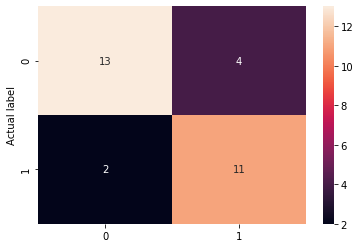

In [12]:
y_test_pred = tree.predict(X_test)

# Confusion Matrix
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels = None, sample_weight = None, normalize = None)

# Confusion Matrix heatmap (0 : glaucoma, 1 : normal)
heatmap_test = sn.heatmap(confusion_matrix_test, annot=True)
heatmap_test.set(xlabel='Predicted label', ylabel='Actual label', xticks=['1','2'])